Please fill in your name and that of your teammate.

You: Ahonon Gobi Parfait

Teammate:

# Introduction

Welcome to the fifth lab. Last week we had a break from math-heavy assignments to allow you to catch up on the fundamentals and tools seen so far. Well, as far as learning Pandas could be considered a break, anyway. We will learn more of this library over the following weeks, I hope you will develop an appreciation for its use over time.  
_"You may find its methods disagreeable, but you can't avoid appreciating the results"_ (cit.)

Spoiler alert: I lied last week, actually IMO Pandas' most confusing feature is `groupby()` :) but you got `loc` and `iloc` already in your pocket now, right?

## Grouping in Pandas

It is time to introduce some of the math applications of Pandas DataFrame and Series, and to the unfriendly-but-oh-so-useful `groupby()`.

From now on we will be using Pandas containers for our data, even directly for the math calculation. Remember that they wrap around Numpy arrays (and you know how to use those now) while giving convenient indexing and extra capabilities. No need to e.g. split the points based on their class into a `dict` as we did for LDA: we can simply _group_ data by label, then all operations will work on the whole feature arrays, and run for all classes at once (and using the underlying, faster C implementation).

Main hint: simply treat a DataFrame just like you would a multi-dimensional Numpy array. Just think of it as a matrix, as you already had, generalized to higher dimensions: a **tensor**. A Pandas Series on the other hand is just a one-dimensional Numpy array (vector). In either case, function calls will be _broadcasted_ to its elements: this means that they will run independently on each element and their results will be aggregated back in a data structure of the same type (list, Series or DataFrame).

We will use `groupby()` extensively from today: typically it takes a while to grasp first, but your code will be legible, and you will need (almost) no more `for` loops nor `dict`s.  
Careful though because the method returns a special [`GroupBy` object](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html), that is somehow unwieldy: **it removes a feature, adds a dimension (the grouping), and does not print directly from its output**. Read this last sentence a couple of times, then again _after_ you start playing around with `groupby()` (seriously, write it on a post-it or something), and it will help to slowly make sense of this.

Initially, try to follow each call to `groupby()` with a `describe()`, to really see what is happening. Also `print` the `groups` for an intuition on how the grouping works: it's basically a `dict` from each element of the "group" (e.g. the classes) to the `Index` values of the corresponding rows. With LDA we already did something similar, by hand, with a `dict` hashing the classes to the actual data (less efficient than using indices).  

A `GroupBy` object is just an implicit (because performance) description on how to split/group the data: any operation you call on it will return multiple results, _one per group_, instead of just one value. This is a sort of "automated mapping", aka [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). Go ahead and play with it a bit: understanding this point is necessary to solve the next questions.  
The trick that did it for me, was to try and ignore its output *per se* (I don't even print it), imagine it's just a fancy version of LDA's per-class `dict` we built by hand, and just call functions on the output since _their_ output makes sense again for me.

From this point on, it is important that you need to start thinking of the dataset as a whole, single, high-dimensional entity, not just a list of points. It's a forest, not trees. Explore it by selecting and slicing this object from different perspectives, as if you were "floating around it in space" rather than being stuck to "read one row at a time". When you use a DataFrame for math, just remember that you are manipulating multiple variables at the same time, and you will get vectorial answers: treat it like a special Numpy data structure, and everything should eventually become intuitive.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 12 points (out of 18 available) to pass** (66%).

In [10]:
# Let me hit ctrl+c ctrl+v for you one last time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

# 1. Fundamentals

This time we start strong with an example that is simple but longer. Take your time to read and understand each part, follow the suggestions, and it should unravel without much trouble.

#### 1.1 **[4pt]** You want to calculate the reliability of a weather forecast service. In the current season, you get rain on 25% of the days. You know that 10% of the time they forecast rain and it does not rain. You also know that 5% of the time they forecast good weather and they are wrong. Using Bayes' rule, calculate by hand the probability that one day it is going to rain given that they earlier forecasted rain.

I suggest you proceed as follows: (i) fill the data you know in an events probability [table](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables), as seen in the lecture; (ii) your events are whether it is going to rain or not, and whether the forecast predicted rain or not; (iii) remember that probabilities sum to a constant over all possible events, so fill in the blanks in (a copy of) the table; (iv) state very clearly what are the posterior, prior, likelihood and evidence; (v) only assemble your Bayes' equation and calculate the numbers, once you are certain of your components.

### Step (i): Fill in the Data

Given table:

|               | Forecasts Rain (F) | Forecasts Good Weather (not F) | Total |
|---------------|---------------------|--------------------------------|-------|
| Rains (R)     |                     | 5                              | 25    |
| Does not rain (not R) | 10          |                                |       |
| Total         |                     |                                | 100   |

From the problem, we know:
- It rains 25% of the time ($P(R) = 0.25$), hence 25 days out of 100.
- 10% of the time they forecast rain and it does not rain ($P(F \mid \neg R) = 0.10$), hence 10 days out of 100.
- 5% of the time they forecast good weather and they are wrong ($P(\neg F \mid R) = 0.05$), hence 5 days out of 100.

Using this information, we can fill in the table:

1. **Rain and Forecasts Good Weather (not F):**
   - $P(\neg F \cap R) = 5$ days (5% of 100).

2. **Total Rain (R):**
   - Total days it rains $= 25$.

3. **Forecasts Rain (F) and Does not Rain (not R):**
   - $P(F \cap \neg R) = 10$ days.

4. **Total Does not Rain (not R):**
   - Total days it does not rain $= 100 - 25 = 75$.

5. **Total Forecasts Good Weather (not F):**
   - $P(\neg F) = 100 - P(F) = 100 - (P(F \cap R) + P(F \cap \neg R))$.

First, let's calculate the missing $P(F \cap R)$:

$ P(F \cap R) = P(R) - P(\neg F \cap R) = 25 - 5 = 20 $

### Updated Table:

|               | Forecasts Rain (F) | Forecasts Good Weather (not F) | Total |
|---------------|---------------------|--------------------------------|-------|
| Rains (R)     | 20                  | 5                              | 25    |
| Does not rain (not R) | 10          | 65                             | 75    |
| Total         | 30                  | 70                             | 100   |

### Step (ii): Define Events

- **Posterior**: $P(R \mid F)$
- **Prior**: $P(R) = 0.25$
- **Likelihood**: $P(F \mid R)$
- **Evidence**: $P(F)$

### Step (iii): Calculate Probabilities

$ P(F \mid R) = \frac{P(F \cap R)}{P(R)} = \frac{20}{25} = 0.8 $

$ P(F) = \frac{30}{100} = 0.3 $

### Step (iv): Apply Bayes' Rule

$ P(R \mid F) = \frac{P(F \mid R) \cdot P(R)}{P(F)} $

$ P(R \mid F) = \frac{0.8 \cdot 0.25}{0.3} = \frac{0.2}{0.3} \approx 0.6667 $

Thus, the probability that it is going to rain given that the forecast predicted rain is approximately $66.67\%$.


#### 1.2 **[1pt]** Explain $\hat{y} = \text{arg}\!\max_{y \in Y}\big\{P(y \,|\, x)\big\}$ .

The predicted value $\(\hat{y}\)$ is the one that maximizes the conditional probability $\(P(y \,|\, x)\)$ among all possible values of $\(y\)$. It is the most likely outcome given the observed input $\(x\)$.

#### 1.3 **[1pt]** How does NB differ from LDA in regards to the covariance of the distributions used to model the data?


**Naive Bayes (NB)**:
- In Naive Bayes, there is an assumption of feature independence given the class label. This means that the features are assumed to be conditionally independent given the class.
- Due to this assumption, the covariance matrix for each class in NB is diagonal (i.e., off-diagonal elements are zero), indicating no covariance between different features.
- This simplifies the model and makes computation more efficient, especially when dealing with high-dimensional data.

**Linear Discriminant Analysis (LDA)**:
- In LDA, there is no assumption of feature independence. Instead, LDA models the distribution of each class using a multivariate normal distribution.
- LDA estimates a covariance matrix for each class, which captures the covariance between different features within the class.
- Unlike NB, LDA does not assume that the features are independent given the class label. Instead, it models the covariance structure of the data directly.


# 2. Model Selection for Naïve Bayes

#### 2.1 **[3pt]** Load the `tips` dataset from Seaborn  (into a Pandas DataFrame). Which distribution would you use to model each of the features in the dataset? Explain your choices.

You load the dataset the same way you did for `iris` before. Obviously you need to study it to be able to answer. You should find useful to consider (i) the list of dtypes for each feature, (ii) the number of unique values for each of the categorical features, (iii) you can use the `pairplot` to quickly inspect the data: can you do better than a simple Gaussian if there are multiple peaks or asymmetry in the distribution of the real-valued features?  
The code cell below is to hold your analysis, while the real answer + motivations go in the Markdown cell just underneath.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
Unique values for 'sex': 2
Unique values for 'smoker': 2
Unique values for 'day': 4
Unique values for 'time': 2


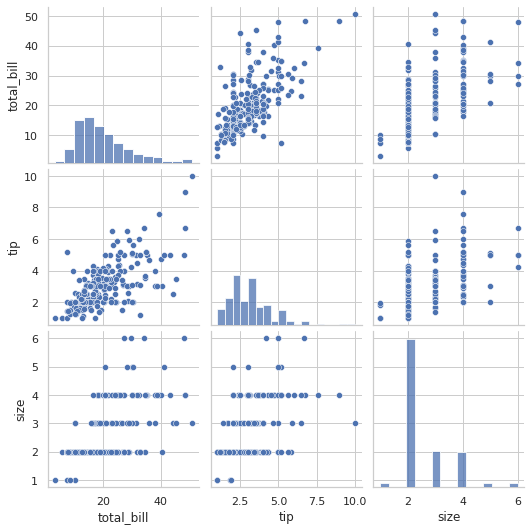

In [11]:
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset("tips")

# Display the first few rows of the dataset
print(tips.head())

# Display information about the dataset
print(tips.info())

# Check the number of unique values for each categorical feature
print("Unique values for 'sex':", tips['sex'].nunique())
print("Unique values for 'smoker':", tips['smoker'].nunique())
print("Unique values for 'day':", tips['day'].nunique())
print("Unique values for 'time':", tips['time'].nunique())

# Visualize the data using pairplot
sns.pairplot(tips)


I can see that the `total_bill` and `tip` features are continuous and appear to be right-skewed. For these features, I would use a log-normal distribution to model the data. The `size` feature is discrete and appears to be categorical, so I would use a multinomial distribution to model it. The `sex`, `smoker`, `day`, and `time` features are categorical, so I would use a categorical distribution to model them.

# 3. Naïve Bayes Classification

Let's write a Naïve Bayes classifier from scratch. We will work with the `iris` dataset (again, from Seaborn) since we know already the data. All features are continuous: for simplicity we can use simple Gaussians, but we should expect some misclassification.

From now on let's also introduce the train-test split so we can start verifying our model's performance the right way. Just use `train` for your answer instead of `df`, and leave `test` for the end.

In [12]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2) # 80-20 split

#### 3.1 **[2pt]** Compute the priors for the three classes of the Iris dataset using the Pandas DataFrame, _in a single line of code_ and without using loops (`for`, `while`, etc.).

One-liners are typically bad practice (remember: readability first!), but here I need to force you to learn this new tool and stop writing `for` loops, since they will not scale from now on.  

Careful as many tutorials online (such as [this one](https://chrisalbon.com/machine_learning/naive_bayes/naive_bayes_classifier_from_scratch/) will explicitly select the class and run the same calculation multiple times (and in multiple lines). This approach **does not scale** to problems with 100 or 10'000 classes: learn to use `groupby()` instead!  
_[Think: this course should make you confident enough to be the one writing the tutorials, and hopefully of much better quality!]_

As a reference, you will need to (i) group the dataframe by species, (ii) select only the grouped elements (returning a Series), (iii) run the Numpy-backed `count()`, (iv) divide by the total number of elements. If you get lost on the `groupby`, try this: `groupby(feature_name)[feature_name]`.

And yes it's not a problem to add a print statement in a second line :)

In [13]:
priors = train.groupby('species')['species'].count() / len(train)
print(priors)   

species
setosa        0.325000
versicolor    0.333333
virginica     0.341667
Name: species, dtype: float64


#### 3.2 **[1pt]** Compute the means and the standard deviations for each feature and for each class of the Iris dataset using the Pandas DataFrame (one line of code each).

As a reference, you should obtain 12 means and 12 standard deviations. Again, the use of `groupby` followed by Numpy's functions will take literally 2 lines and no loops. Remember to use the `train` data!

In [14]:
means = train.groupby('species').mean()
stds = train.groupby('species').std()
print(means)
print(stds)


            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          4.989744     3.402564      1.471795     0.246154
versicolor      5.975000     2.775000      4.225000     1.305000
virginica       6.690244     3.021951      5.648780     2.058537
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.328309     0.353544      0.166936     0.099594
versicolor      0.542430     0.326402      0.480251     0.196051
virginica       0.641796     0.322112      0.555483     0.281048


Here is a freebie to save you some debugging time: the (stunted) equation for the Gaussian probability. Stunted in the sense that, since it is only used to maximize the class probability, parts that do not depend on the class have been dropped (as usual). It requires you to define first the variables `means` and `stds` from the previous question (both $(3\times4)$ DataFrames).

If you really want to understand what is going on (especially with Pandas), I challenge you to comment it out, pull the slides, and write your own. You did something very close for LDA, feel free to review your code. You don't need it to look identical as long as it does the same job.

Remember that Naïve Bayes computes the class likelihood as a product of the independent probabilities for each feature: this is done by the `product()` on the columns. If you remove that, you should have 12 values (give it a try).

When passing a line of input to `likelihood` be careful to remove the last column (the `species`) as in the example below (in our previous calculations this was done by the `groupby()`, which made a new dimension out of it).

Also something that can be important: sometimes `iloc[]` converts the type of the data slice, so you can have errors because a function cannot be broadcasted. In that case, remember that calling `.astype('float')` will force the dtype to `float` and address some of these errors. This is not the most elegant solution, I will leave it to you to find a better one ;)

In [15]:
# What do you think of the style of this Gaussian one-liner?
likelihood = lambda x: (np.exp(-(x-means)**2/(2*stds**2))/stds).product(axis=1)
likelihood(train.iloc[0, :-1].astype('float'))

species
setosa        3.496535e-182
versicolor     3.602941e-02
virginica      1.869496e+01
dtype: float64

#### 3.3 **[1pt]** Write a Python function that takes a single line of input $x$ and returns the prediction of its class $\hat{y}$. Run it on the same data point as the example cell above. Is the prediction the same as you would have from the cell above? Why / why not?

As a sanity check: it should take a row as input (without labels, as for `likelihood` above) and return the string found in the `index` of the max value (the documentation is your friend).

In [16]:
def my_predict_fn(x):
    return (priors * likelihood(x)).idxmax()

print(my_predict_fn(train.iloc[0, :-1].astype('float')))


virginica


The prediction is not the same as the one from the cell above because the `my_predict_fn` function returns the class label of the maximum likelihood, while the likelihood function returns the actual likelihood value. The prediction is based on the class with the highest likelihood, not the likelihood value itself.

#### 3.4 **[2pt]** Compute $\hat{y}$ for all points in the `test` dataset, in one line and without using Python loops (`for`, `while`, etc.). Compare it with the correct label $y$ and print the number of misclassified points.

And here is how you use the test set: after the training on the train set is complete, you evaluate its performance on data it was not trained on. This is absolutely **crucial** in machine learning. We will use this process from now on, and using the wrong dataset (either for training or testing) will be considered a major error (so careful with typos! Double-check every time!). If you wonder why so strict, check again the 4th lecture and ask yourself what are the consequences of getting it wrong in a work or research setting (and feel free to discuss on Moodle).

Again, no loops: you need both to drop the last column and then to apply the function to the rows. For example: `train.iloc[:, :-1].apply(my_predict_fn, axis=1)`. Can you make it look nicer/more readable?

Remember you can count the number of `True` values in a numpy array simply by calling `sum()` on it.

In [17]:
misclassified = (test.iloc[:, :-1].apply(my_predict_fn, axis=1) != test['species']).sum()

print(misclassified/len(test.iloc[:, :-1].apply(my_predict_fn, axis=1)))


0.06666666666666667


#### 3.5 **[1pt]** Why did we not compute (nor need) the _evidence_ for predicting the input's class?

We did not compute the evidence for predicting the input's class because we are only interested in finding the class with the maximum likelihood. The evidence is a normalization constant that ensures that the probabilities sum to 1 over all classes. However, since we are only interested in the class with the highest likelihood, we can ignore the evidence term and directly compare the likelihoods of different classes to find the most likely class.

#### 3.6 **[2pt]** Train a scikit-learn Naïve Bayes Gaussian classifier on the Iris train data using a Pandas Dataframe, and print the number of misclassified points on the test data.

Remember that:
- Now that we have a bit more experience with Pandas we can learn how to pass the DataFrames directly to scikit-learn.
- The training data should always be 2D (i.e. DataFrame) and not have the label (`train.iloc[:,:-1]`, do you know what each `:` stands for?).
- The labels should always be 1D (i.e. Series) and numerical. Rather than doing the conversion manually, you should convert the feature to categorical and then use its codes (`train['species'].astype('category').cat.codes`).
- Mistakenly testing on the train set will fail the question, as will comparing the prediction against the train set labels (hint hint).
- You will probably get better results with scikit-learn because it uses multivariate Gaussians and improved estimators (check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [18]:
from sklearn.naive_bayes import GaussianNB

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(train.iloc[:, :-1], train['species'].astype('category').cat.codes)

# Predict the classes for the test data
y_pred = gnb.predict(test.iloc[:, :-1])

# Compute the number of misclassified points
misclassified = (y_pred != test['species'].astype('category').cat.codes).sum()
print(misclassified/len(test))

0.06666666666666667


# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Do a bit of independent research, and propose below the simplest example you can, to make evident how the frequentist and Bayesian approaches are different.

I advise against blind copy+paste from the Internet in this case, I have seen so many incorrect opinions and tutorials over the years it is frankly ridiculous. I suggest you rather argue a bit on the Moodle about the approaches themselves, so you can make sure your example is correct.

A good intro: [[link]](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading20.pdf).

#### BONUS **[ZERO pt]** Train a Gaussian NB (either your code or scikit-learn) on the full Iris dataset (no train-test split) and check the misclassifications. Train the same on the 80% training data, then check and aggregate misclassifications both on the train and test datasets. You will probably get the same number of total errors regardless of whether you trained on 80% or 100% of the data. Can you explain why? The reason was mentioned in the last lecture. Feel free to play with different splits until you find how low can you go with the training before increasing the number of errors. Use the term `statistically representative` in your explanation.

### Final considerations

- This is the first core ML method we are covering in the course. As you see you need to know quite a few concepts before we can really discuss its inner workings.
- On the other hand, you now already own most of the glossary and knowledge needed, so you only need to put it all together. The rest of the course will follow this same pattern.
- This is also your first method capable of *nonlinear classification*. Notice how LDA used nonlinear models for the data (Gaussian clusters) but still relied on linear separation boundaries (weirdly obtaining $m$ and $q$ from class-pair inequalities)? NB can work with multiple classes and different types of distributions (think Mixture of Gaussians), the division boundary is not (necessarily) a line anymore.
- In the next two lectures we will start learning about one of the bigger classic ML tools still state-of-the-art today: the Support Vector Machine, and the Kernel Trick. We are reaching the "cruise speed" level of complexity for the course, we will stay close to this level until the exam. Keep up with the lectures and exercises and you should have no trouble. Good luck!